# 8. Solvers
http://docs.sympy.org/latest/tutorial/solvers.html

In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## A Note about Equations
Recall from the gotchas section of this tutorial that ***symbolic equations*** in SymPy are not represented by = or ==, but by ***Eq***.

In [3]:
eq = Eq(x, y)
eq

However, there is an even easier way. In SymPy, any expression not in an Eq is ***automatically assumed to equal 0*** by the solving functions. Since a=b if and only if a−b=0, this means that instead of using x == y, you can just use x - y. For example

In [5]:
solveset(Eq(x**2, 1), x)

In [6]:
solveset(Eq(x**2 - 1, 0), x)

In [7]:
solveset(x**2 -1, x)

This is particularly useful if the equation you wish to solve is already equal to 0. Instead of typing ***solveset(Eq(expr, 0), x)***, you can just use ***solveset(expr, x)***.

## Solving Equations Algebraically
The main function for solving algebraic equations is ***solveset***. The syntax for solveset is ***solveset(equation, variable=None, domain=S.Complexes)*** Where equations may be in the form of Eq instances or expressions that are assumed to be equal to zero.

Please note that there is an another function called as ***solve*** which can also be used to solve equations. The syntax is ***solve(equations, variables)*** However, ***it is recommended to use solveset instead***.

When solving a single equation, the output of solveset is a ***FiniteSet*** or an ***Interval*** or ***ImageSet*** of the solutions.

In [8]:
solveset(x**2 - x, x)

In [10]:
solveset(x - x, x, domain = S.Reals)

In [12]:
type(S)

sympy.core.singleton.SingletonRegistry

In [13]:
solveset(sin(x) - 1, x, domain = S.Reals)

If there are no solutions, an ***EmptySet*** is returned and  
if it is not able to find solutions then a ***ConditionSet*** is returned.

In [14]:
solveset(exp(x), x)

In [15]:
solveset(cos(x) - x, x)

In the solveset module, the ***linear system of equations*** is solved using ***linsolve***. In future we would be able to use linsolve directly from solveset. Following is an example of the ***syntax of linsolve***.

- List of Equations Form:

In [16]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

- Augmented Matrix Form:

In [17]:
 linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)) 

- A*x = b Form

In [18]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

#### Note
The order of solution corresponds the order of given symbols.

solveset reports each solution only once. To get the ***solutions of a polynomial including multiplicity*** use ***roots***.

In [19]:
solveset(x**3 - 6*x**2 + 9*x, x)

In [20]:
roots(x**3 - 6*x**2 + 9*x, x)

The output {0: 1, 3: 2} of roots means that 0 is a root of multiplicity 1 and 3 is a root of ***multiplicity 2***.

#### Note
Currently solveset is not capable of solving the following types of equations:
- Non-linear multivariate system
- Equations solvable by LambertW (Transcendental equation solver).

***solve*** can be used for such cases:

In [21]:
solve([x*y - 1, x - 2], x, y)

## Solving Differential Equations
To solve differential equations, use ***dsolve***. First, create an ***undefined function*** by passing ***cls=Function*** to the symbols function.

In [22]:
f, g = symbols('f g', cls = Function)

In [23]:
type(f)

sympy.core.function.UndefinedFunction

f and g are now ***undefined functions***. We can call f(x), and it will represent an unknown function.

In [24]:
f(x)

Derivatives of f(x) are unevaluated.

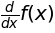

In [26]:
f(x).diff(x)

To represent the differential equation $f''(x) - 2f'(x) + f(x) = \sin(x)$, we would thus use

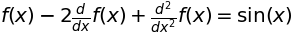

In [27]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

To solve the ODE, pass it and the function to solve for to ***dsolve***.

In [30]:
solutions = dsolve(diffeq, f(x))
solutions

In [31]:
type(solutions)

sympy.core.relational.Equality

dsolve returns an ***instance of Eq***. This is because in general, solutions to differential equations cannot be solved explicitly for the function.

In [32]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x)) 

The arbitrary constants in the solutions from dsolve are symbols of the form C1, C2, C3, and so on.